<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/master/python_render_obj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python 3

In [0]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
!PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
print(os.environ['PYOPENGL_PLATFORM']) 


In [76]:
# https://github.com/eduble/gl
!apt install libgl1-mesa-dri libegl1-mesa libgbm1
!pip install wheel
!pip install numpy
!pip install Cython
!git clone https://github.com/mcfletch/pyopengl.git
%cd pyopengl
!python setup.py develop
%cd accelerate
!python setup.py develop
%cd /content/

!pip install transforms3d

# download hand model
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh_no_mtl.obj


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libegl1-mesa is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgbm1 is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgl1-mesa-dri is already the newest version (18.2.8-0ubuntu0~18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
fatal: destination path 'pyopengl' already exists and is not an empty directory.
/content/pyopengl
running develop
running egg_info
writing PyOpenGL.egg-info/PKG-INFO
writing dependency_links to PyOpenGL.egg-info/dependency_links.txt
writing top-level names to PyOpenGL.egg-info/top_level.txt
reading manifest file 'PyOpenGL.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'PyOpenGL.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.6/site

In [77]:
import OpenGL.GL as gl
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


4.1.0 NVIDIA 410.79
NVIDIA Corporation


In [78]:
# Install pyrender
!pip install pyrender

In [0]:
import pyrender
import os
import numpy as np
import trimesh
import pyrender
import transforms3d
import OpenGL.GL as gl


In [80]:
!pwd
%cd /content/
  
# Load the hand trimesh and put it in a scene
hand_trimesh = trimesh.load('hand_mesh_no_mtl.obj') # be careful about the filename "with 1" on Github
vertex_colors = np.random.uniform(size=hand_trimesh.vertices.shape)
hand_trimesh.visual.vertex_colors = vertex_colors
hand_trimesh.visual.face_colors = np.random.uniform(size=hand_trimesh.faces.shape)

mesh = pyrender.Mesh.from_trimesh(hand_trimesh, smooth=False) #, material

/content
/content


In [81]:
scene = pyrender.Scene(bg_color=[1.0, 1.0, 1.0, 0.0])
scene.add(mesh, pose=np.eye(4))


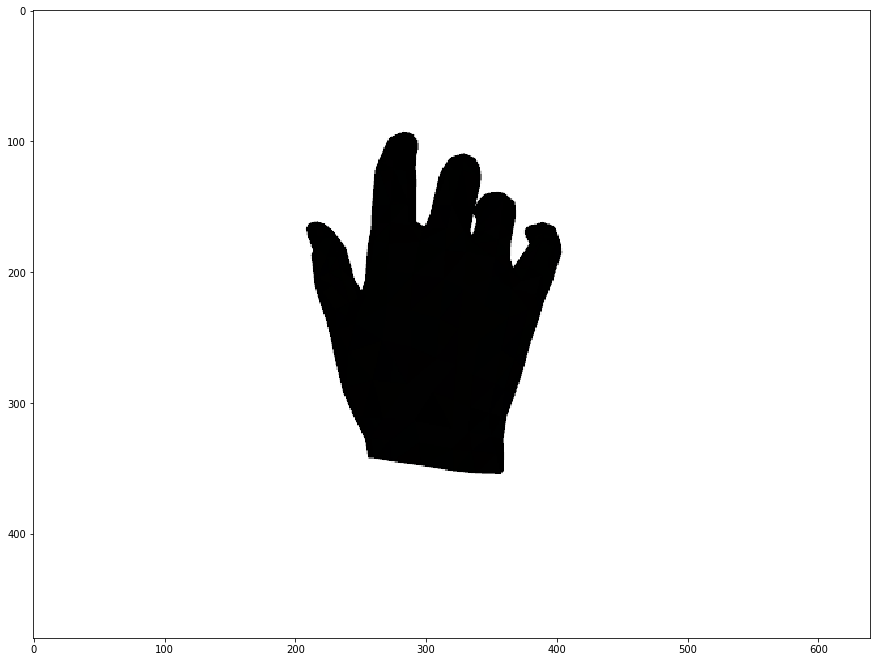

In [82]:
from matplotlib import pyplot as plt

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)

# look at the hand from a certain distance
# rotate to view the hand from a different angle

rotation = transforms3d.euler.euler2mat(0, np.pi/2, np.pi/2, axes='sxyz') # in tutorial matrix it is np.pi/4, 0, np.pi/2,

# translations
T = [[1.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 250.0],
     [0.0, 0.0, 0.0, 1.0]]
Z = [1.0, 1.0, 1.0] # zooms
B = transforms3d.affines.compose([45.0, 0.0, 0.0], rotation, Z) # applies translation last
camera_pose = np.matmul(B, T)

scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640, 480)
flags = pyrender.RenderFlags.RGBA | pyrender.RenderFlags.OFFSCREEN
color, depth = r.render(scene, flags=flags)


plt.figure(figsize=(15,15))
plt.axis('on')
plt.imshow(color)

# print(color)

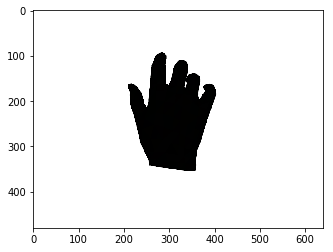

In [83]:
plt.imshow(color)


In [0]:
# download background images dataset
# !wget http://groups.csail.mit.edu/vision/datasets/ADE20K/ADE20K_2016_07_26.zip
# !unzip ADE20K_2016_07_26.zip

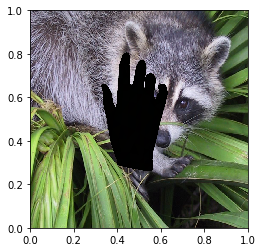

In [85]:
# show rendered hand in front of a random background image
# source: https://stackoverflow.com/questions/34495817/plotting-a-background-image-to-a-matplotlib-graph
from matplotlib import pyplot as plt
from scipy.misc import face
import numpy as np

fig, ax = plt.subplots(1, 1)

background = ax.imshow(face(), cmap=plt.cm.gray, extent=[0, 1, 0, 1])
image = ax.imshow(color, extent=[0, 1, 0, 1])

plt.show()